In [1]:
#Import library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import data train yang diberikan
df_train = pd.read_csv("Dataset/kendaraan_train_clean.csv")
#Import data test yang diberikan
df_test = pd.read_csv("Dataset/kendaraan_test_clean.csv")

In [3]:
#Drop kolom id pada data train karena pada data test tidak ada kolom id
df_train.drop(['id'], axis=1, inplace=True)
#Menampilkan lima data teratas dari data train
df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1.0,0.153846,1.0,0.634615,1.0,0.5,1.0,0.409000,0.932099,0.301038,0.0
1,0.0,0.430769,1.0,0.750000,0.0,1.0,0.0,0.367431,0.172840,0.512111,0.0
2,0.0,0.015385,1.0,0.884615,1.0,0.5,1.0,0.496727,0.981481,0.377163,0.0
3,0.0,0.461538,1.0,0.673077,0.0,1.0,0.0,0.536338,0.537037,0.636678,0.0
4,0.0,0.015385,1.0,0.673077,1.0,0.5,1.0,0.310270,0.932099,0.557093,0.0


In [4]:
#Menampilkan lima data teratas dari data test
df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1.0,0.446154,1.0,0.153846,0.0,0.0,0.0,0.082475,0.154321,0.467128,0.0
1,0.0,0.030769,1.0,0.903846,1.0,0.5,1.0,0.068822,0.932099,0.799308,0.0
2,0.0,0.061538,1.0,0.538462,1.0,0.5,1.0,0.200636,0.932099,0.179931,0.0
3,0.0,0.400000,1.0,0.153846,1.0,0.0,1.0,0.062575,0.759259,0.083045,0.0
4,0.0,0.230769,1.0,0.442308,0.0,0.0,0.0,0.045268,0.932099,0.757785,0.0


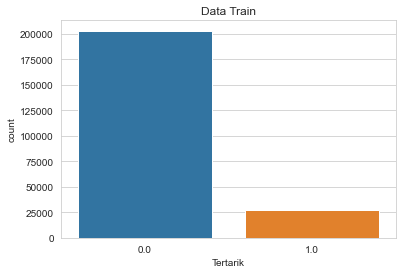

In [5]:
#Memvisualisasikan jumlah orang yang tertarik dan tidak tertarik membeli mobil berdasarkan data train yang diberikan
sns.set_style('whitegrid')
sns.countplot(x='Tertarik', data=df_train)
plt.title("Data Train")
plt.show()

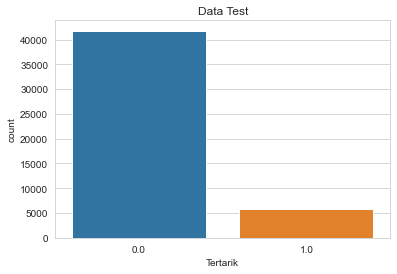

In [6]:
#Memvisualisasikan jumlah orang yang tertarik dan tidak tertarik membeli mobil berdasarkan data test yang diberikan
sns.set_style('whitegrid')
sns.countplot(x='Tertarik', data=df_test)
plt.title("Data Test")
plt.show()

In [7]:
#Mendefinisikan data train
X_train = df_train.drop('Tertarik', axis=1)
y_train = df_train['Tertarik']

#Mendefinisikan data test
X_test = df_test.drop('Tertarik', axis=1)
y_test = df_test['Tertarik']

**MEMBUAT FUNGSI-FUNGSI YANG DIBUTUHKAN**

In [8]:
#Import library yang digunakan untuk evaluasi matric
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score

#Membuat fungsi untuk mengembalikan nilai nama model, precision, recall, f1 score, roc-auc, dan akurasi
def get_all(mod, name):
    title = name
    prec = precision_score(y_test, mod.predict(X_test))
    recall = recall_score(y_test,  mod.predict(X_test))
    f1 = f1_score(y_test,  mod.predict(X_test))
    roc_auc = roc_auc_score(y_test,  mod.predict_proba(X_test)[:, 1])
    accuracy = accuracy_score(y_test,  mod.predict(X_test))

    return title, prec, recall, f1, roc_auc, accuracy

In [24]:
#Membuat fungsi yang akan mengoutputkan akurasi data test berdasarkan model yang telah dibuat
def get_accuracy(classifier, classifier_name):
    print("Akurasi score model {} {}".format(classifier_name, accuracy_score(classifier.predict(X_test), y_test)))

#Membuat fungsi yang akan menampilkan confusion matrix beserta report dari model
def get_detail_test(mod, title):
    prediction = mod.predict(X_test)
    cf_matrix = confusion_matrix(y_test, prediction)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{g1}\n{g2}\n{g3}" for g1, g2, g3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(8,4))
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='YlGnBu')
    plt.title("Confusion Matrix {}".format(title))
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Value")
    plt.show()

    _, prec, recall, f1, roc_auc, accuracy = get_all(mod, title)
    print(f"Report Model {title} :")
    print(f"Precision\t: {prec} ")
    print(f"Recall\t\t: {recall} ")
    print(f"F1-Score\t: {f1} ")
    print(f"ROC-AUC\t\t: {roc_auc} ")
    print(f"Akurasi\t\t: {accuracy}")

In [10]:
#Import library yang akan digunakan untuk membuat kurva ROC dan mendapatkan nilai AUC
from sklearn.metrics import roc_curve, auc

#Membuat fungsi curve yang akan mengembalikan nilai dari false positive rate dan true positive rate
def tpr_fpr(mod):
    y_prob = mod.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    return fpr, tpr

**MEMBANGUN MODEL KNN**

In [11]:
#Mencari nilai k optimal untuk k-NN
#Import library KNN
from sklearn.neighbors import KNeighborsClassifier

#Membuat array kosong digunakan untuk menampung error rate
error_rate = []
#Melakukan pengujian dengan nilai K=1 hingga K=40
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Minimum error rate 0.1241209933038057 at K =  37


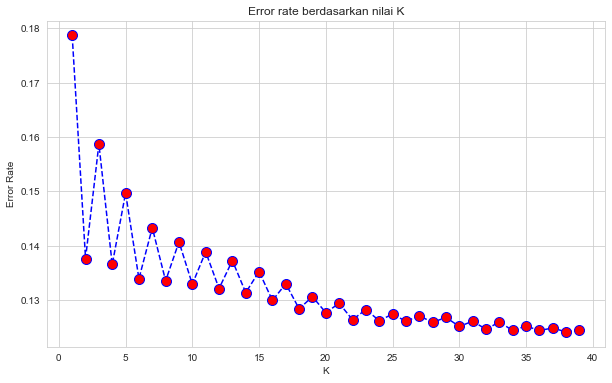

In [12]:
#Memvisualisasikan error rate berdasarkan k value atau jumlah tetangga terdekat dari pemodelakn knn
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle = 'dashed', marker='o', markerfacecolor='red',
markersize=10)
plt.title("Error rate berdasarkan nilai K")
plt.xlabel("K")
plt.ylabel("Error Rate")

#Mendapatkan minimum rate beserta nilai K
print("Minimum error rate", min(error_rate), "at K = ", error_rate.index(min(error_rate)))
#Menyimpan nilai optimal ke dalam variable optimal_k
optimal_k = error_rate.index(min(error_rate))

In [13]:
#Membangun model KNN berdasarkan nilai k yang paling optimal
knn = KNeighborsClassifier(n_neighbors=37)

#Melatih model
knn.fit(X_train, y_train)
#Memprediksi model
knn_pred = knn.predict(X_test)
#Menghitung probabilitas model
knn_proba = knn.predict_proba(X_test)[:, 1]

In [14]:
#Memanggil fungsi get_accuracy yang akan mengoutputkan akurasi model
get_accuracy(knn, "K-Nearest Neighbor")

Akurasi score model K-Nearest Neighbor 0.875144314532211


**EVALUASI MODEL KNN**

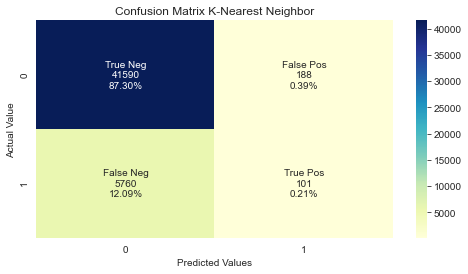

Report Model K-Nearest Neighbor :
Precision	: 0.3494809688581315 
Recall		: 0.017232554171643065 
F1-Score	: 0.03284552845528455 
ROC-AUC		: 0.8289207640528646 
Akurasi		: 0.875144314532211


In [25]:
get_detail_test(knn, "K-Nearest Neighbor")

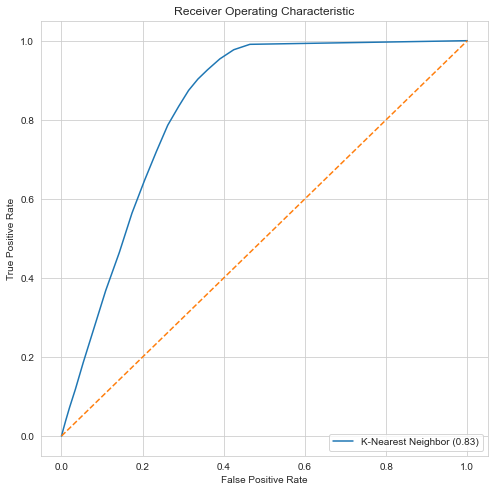

In [16]:
#Memvisualisasikan ROC-AUC
plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')
fpr, tpr = (tpr_fpr(knn))
plt.plot(fpr, tpr, label=f"K-Nearest Neighbor ({'%.2f'%auc(fpr, tpr)})")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**EKSPERIMEN MENGGUNAKAN BEBERAPA MODEL**

In [17]:
#Import library yang dibunakan dalam membangun model
#Library untuk membangun model Logistic Regression dan SGD Classifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
#Library untuk membangun model Decision Tree
from sklearn.tree import DecisionTreeClassifier
#Library untuk membangun model Random Forest
from sklearn.ensemble import RandomForestClassifier
#Library untuk membangun model Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Library untuk membangun model XGBoost
from xgboost import XGBClassifier


#Membuat array yang berisi model yang dibangun
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    GaussianNB(),
    SGDClassifier(loss='modified_huber'),
    XGBClassifier()
]

#Membuat array yang berisi nama model
model_name = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "Gaussian Naive Bayes",
    "SGD Classifier",
    "XGBoost"
]

**EVALUASI MODEL**

In [18]:
#Membuat perulangan berdasarkan array dari model dan nama model
for m, n in zip(models, model_name):
    #Melatih model
    if type(m) == type(XGBClassifier()):
        m.fit(X_train, y_train, eval_metric='rmse')
    else:
        m.fit(X_train, y_train)
    #Memanggil fungsi get_accuracy yang sudah dibuat sebelumnya
    get_accuracy(m, n)

Akurasi score model Logistic Regression 0.8769705493398267
Akurasi score model Decision Tree 0.794685026973698
Akurasi score model Random Forest 0.8536703121392136
Akurasi score model Gaussian Naive Bayes 0.6395600243497974
Akurasi score model SGD Classifier 0.8769705493398267
Akurasi score model XGBoost 0.8340015533491467


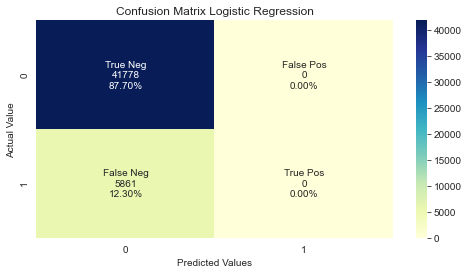

Report Model Logistic Regression :
Precision	: 0.0 
Recall		: 0.0 
F1-Score	: 0.0 
ROC-AUC		: 0.8201873061312235 
Akurasi		: 0.8769705493398267


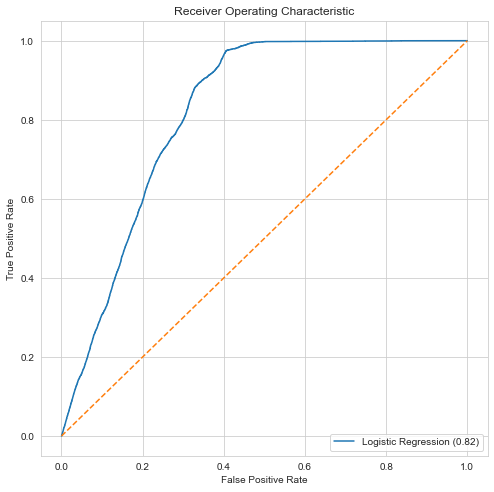

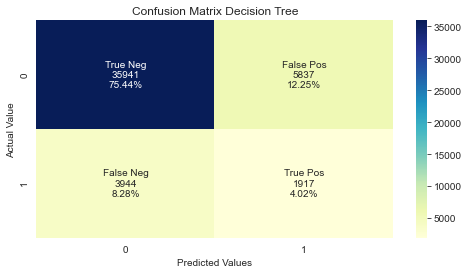

Report Model Decision Tree :
Precision	: 0.2472272375548104 
Recall		: 0.32707729056475005 
F1-Score	: 0.28160117517443994 
ROC-AUC		: 0.5936813040980197 
Akurasi		: 0.794685026973698


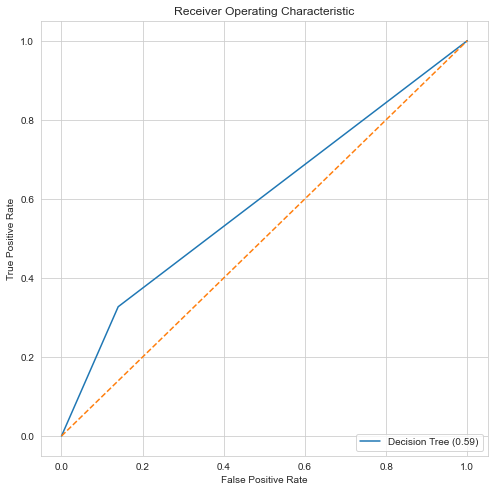

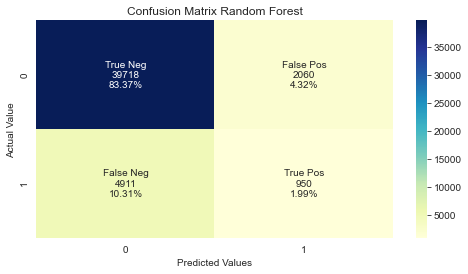

Report Model Random Forest :
Precision	: 0.31561461794019935 
Recall		: 0.16208838082238525 
F1-Score	: 0.21418103934167512 
ROC-AUC		: 0.8275335006789857 
Akurasi		: 0.8536703121392136


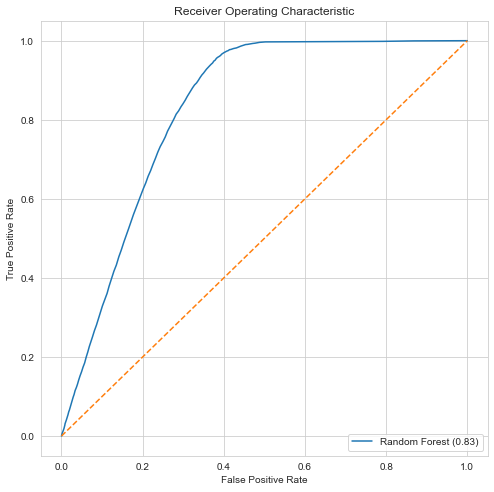

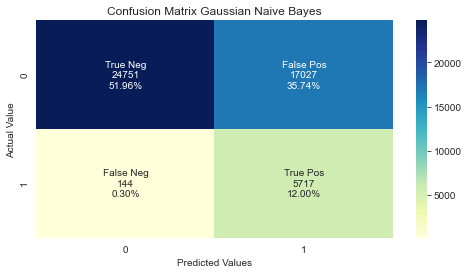

Report Model Gaussian Naive Bayes :
Precision	: 0.25136299683432994 
Recall		: 0.9754308138542911 
F1-Score	: 0.39972032861387874 
ROC-AUC		: 0.8252467917922595 
Akurasi		: 0.6395600243497974


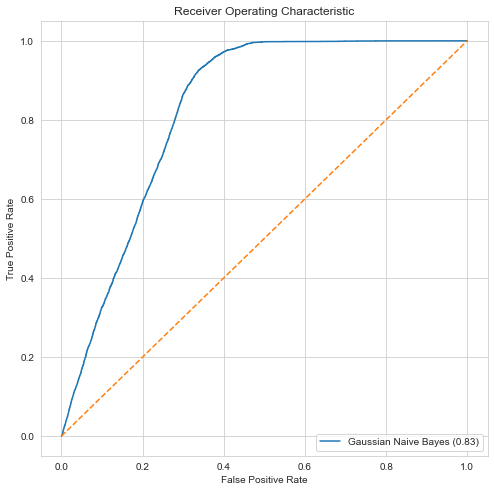

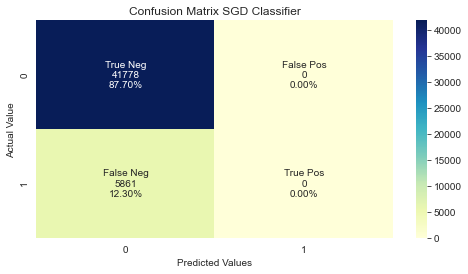

Report Model SGD Classifier :
Precision	: 0.0 
Recall		: 0.0 
F1-Score	: 0.0 
ROC-AUC		: 0.8181147801091181 
Akurasi		: 0.8769705493398267


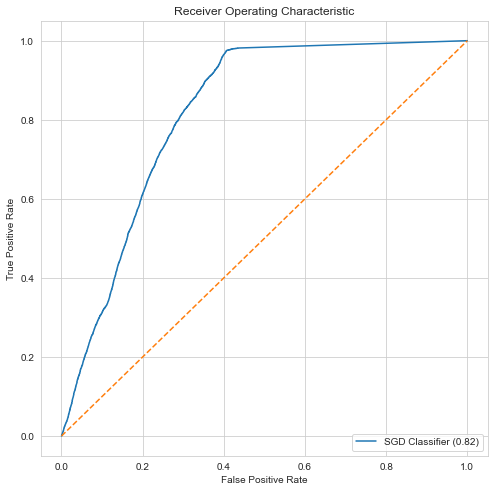

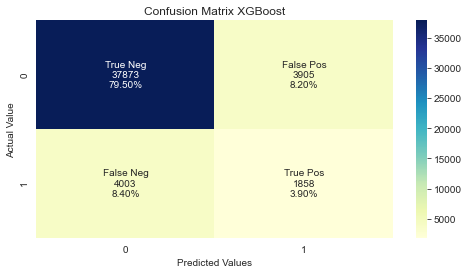

Report Model XGBoost :
Precision	: 0.32240152698247443 
Recall		: 0.3170107490189387 
F1-Score	: 0.31968341362697866 
ROC-AUC		: 0.83169347139999 
Akurasi		: 0.8340015533491467


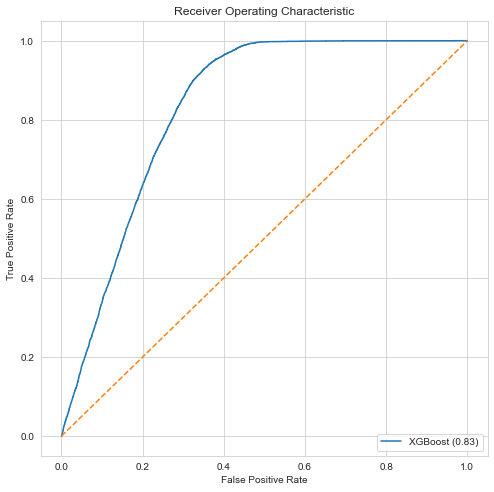

In [26]:
#Proses report dan visualisasi ROC-AUC setiap model
for m, n in zip(models, model_name):
    #Memanggil fungsi get_detail_test
    get_detail_test(m, n)

    #Memvisualisasikan ROC-AUC
    plt.figure(figsize=(8,8))
    plt.title('Receiver Operating Characteristic')
    fpr, tpr = (tpr_fpr(m))
    plt.plot(fpr, tpr, label=f"{n} ({'%.2f'%auc(fpr, tpr)})")
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

**PERBANDINGAN MODEL**

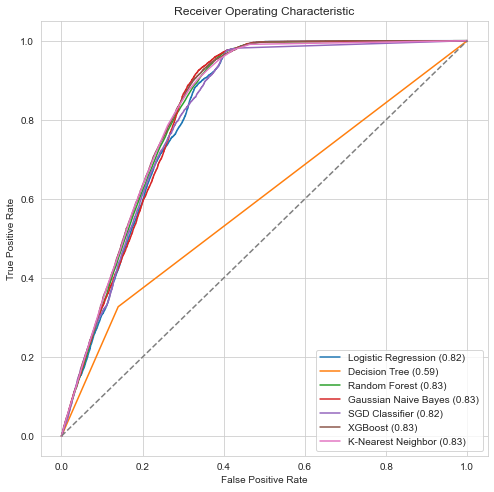

In [20]:
#Memvisualisasikan ROC-AUC setiap model
plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')
for m, n in zip(models, model_name):
    fpr, tpr = (tpr_fpr(m))
    plt.plot(fpr, tpr, label=f"{n} ({'%.2f'%auc(fpr, tpr)})")
knn_fpr, knn_tpr = tpr_fpr(knn)
plt.plot(knn_fpr, knn_tpr, label=f"K-Nearest Neighbor ({'%.2f'%auc(knn_fpr, knn_tpr)})")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
#Membuat array kosong yang digunakan untuk menampung nilai dari fungsi get_all dari setiap model
report = []
report.append(["K-Nearest Neighbor", precision_score(y_test, knn_pred), recall_score(y_test, knn_pred),
f1_score(y_test, knn_pred), roc_auc_score(y_test, knn_pred), accuracy_score(y_test, knn_pred)])
for m, n in zip(models, model_name):
    title, prec, recall, f1, roc_auc, accuracy = get_all(m, n)
    report.append([title, prec, recall, f1, roc_auc, accuracy])

eval = pd.DataFrame(report, columns=["Model", "Precision", "Recall", "F1-score", "ROC-AUC", "Accuracy"])
eval.sort_values(by=['ROC-AUC'], ascending=False)

,Model,Precision,Recall,F1-score,ROC-AUC,Accuracy
6,XGBoost,0.322402,0.317011,0.319683,0.831693,0.834002
3,Random Forest,0.315615,0.162088,0.214181,0.827534,0.853670
4,Gaussian Naive Bayes,0.251363,0.975431,0.399720,0.825247,0.639560
1,Logistic Regression,0.000000,0.000000,0.000000,0.820187,0.876971
5,SGD Classifier,0.000000,0.000000,0.000000,0.818115,0.876971
2,Decision Tree,0.247227,0.327077,0.281601,0.593681,0.794685
0,K-Nearest Neighbor,0.349481,0.017233,0.032846,0.506366,0.875144
